https://www.kaggle.com/datasets/adityakadiwal/water-potability/data

# Importing Libraries:

In [8]:
#Import libraries
from sklearn.metrics import mean_squared_error,r2_score,silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import plotly.express as px
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import t
# Suppress all warnings
warnings.filterwarnings("ignore")

# Loading the Dataset:

In [55]:
# Read the Data
df = pd.read_csv('water.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# EDA:

In [56]:
# Get information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


The provided DataFrame contains water quality data with ten columns, including parameters such as pH, hardness, solids, chloramines, sulfate, conductivity, organic carbon, trihalomethanes, turbidity, and potability. Each row represents a water sample, with a total of 3276 entries. Some columns, such as pH, sulfate, and trihalomethanes, have missing values, indicated by the difference between the total number of entries and the non-null count. The data types primarily consist of floating-point numbers (float64) for the water quality parameters, except for the "Potability" column, which is represented as an integer (int64) indicating whether the water is potable (1) or not (0). This dataset provides valuable insights into various aspects of water quality, allowing for analysis and exploration of factors influencing potability and overall water safety. However, addressing missing values and potentially performing feature engineering or preprocessing may be necessary before utilizing the data for modeling or decision-making purposes.li>
</ul>


In [57]:
#Checking for null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

The presence of missing values, particularly in the pH, sulfate, and trihalomethanes columns, suggests that some data points lack measurements for these parameters. Depending on the extent of missing data and the importance of these features, handling missing values through imputation or removal may be necessary to ensure the integrity and reliability of subsequent analyses or modeling efforts.

In [58]:
# Dropping Missing values
df = df.dropna(subset=['ph', 'Sulfate', 'Trihalomethanes'])
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [59]:
# Descriptive Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.085990,1.573337,0.227499,6.089723,7.027297,8.052969,14.000000
Hardness,2011.0,195.968072,32.635085,73.492234,176.744938,197.191839,216.441070,317.338124
Solids,2011.0,21917.441374,8642.239815,320.942611,15615.665390,20933.512750,27182.587067,56488.672413
Chloramines,2011.0,7.134338,1.584820,1.390871,6.138895,7.143907,8.109726,13.127000
Sulfate,2011.0,333.224672,41.205172,129.000000,307.632511,332.232177,359.330555,481.030642
Conductivity,2011.0,426.526409,80.712572,201.619737,366.680307,423.455906,482.373169,753.342620
Organic_carbon,2011.0,14.357709,3.324959,2.200000,12.124105,14.322019,16.683049,27.006707
Trihalomethanes,2011.0,66.400859,16.077109,8.577013,55.952664,66.542198,77.291925,124.000000
Turbidity,2011.0,3.969729,0.780346,1.450000,3.442915,3.968177,4.514175,6.494749
Potability,2011.0,0.403282,0.490678,0.000000,0.000000,0.000000,1.000000,1.000000


In [60]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
   
# Example usage:
explore_data(df)

Major Moments:
                         Mean        Median  Standard Deviation  Skewness  \
ph                   7.085990      7.027297            1.573337  0.048947   
Hardness           195.968072    197.191839           32.635085 -0.085237   
Solids           21917.441374  20933.512750         8642.239815  0.595894   
Chloramines          7.134338      7.143907            1.584820  0.012976   
Sulfate            333.224672    332.232177           41.205172 -0.046558   
Conductivity       426.526409    423.455906           80.712572  0.266869   
Organic_carbon      14.357709     14.322019            3.324959 -0.020018   
Trihalomethanes     66.400859     66.542198           16.077109 -0.051422   
Turbidity            3.969729      3.968177            0.780346 -0.033051   
Potability           0.403282      0.000000            0.490678  0.394614   

                 Kurtosis  
ph               0.623107  
Hardness         0.527205  
Solids           0.345032  
Chloramines      0.551546

<ul>
    <li><strong>ph:</strong> The pH of water samples has a mean of approximately 7.09 and a median of 7.03, indicating a slightly acidic to neutral range. The data is moderately dispersed, with a standard deviation of 1.57. It exhibits a slight positive skewness, indicating a longer right tail, and a positive kurtosis, suggesting a slightly peaked distribution.</li>
    <li><strong>Hardness:</strong> Water hardness shows a mean of around 195.97 and a median of 197.19. The data is moderately dispersed, with a standard deviation of 32.64. It demonstrates a slight negative skewness and a positive kurtosis, indicating a slightly peaked distribution.</li>
    <li><strong>Solids:</strong> The total dissolved solids in water samples have a mean of approximately 21,917.44 and a median of 20,933.51. The data exhibits moderate dispersion, with a standard deviation of 8642.24. It shows a positive skewness, indicating a longer right tail, and a positive kurtosis, suggesting a slightly peaked distribution.</li>
    <li><strong>Chloramines:</strong> Chloramines levels have a mean of around 7.13 and a median of 7.14. The data is moderately dispersed, with a standard deviation of 1.58. It shows a very slight positive skewness and a positive kurtosis, indicating a slightly peaked distribution.</li>
    <li><strong>Sulfate:</strong> Sulfate content has a mean of approximately 333.22 and a median of 332.23. The data demonstrates moderate dispersion, with a standard deviation of 41.21. It exhibits a slight negative skewness and a positive kurtosis.</li>
    <li><strong>Conductivity:</strong> Water conductivity shows a mean of around 426.53 and a median of 423.46. The data is moderately dispersed, with a standard deviation of 80.71. It exhibits a positive skewness and a negative kurtosis, indicating a slightly flatter distribution.</li>
    <li><strong>Organic Carbon:</strong> The organic carbon levels have a mean of approximately 14.36 and a median of 14.32. The data shows moderate dispersion, with a standard deviation of 3.32. It exhibits a very slight negative skewness and a positive kurtosis.</li>
    <li><strong>Trihalomethanes:</strong> Trihalomethanes have a mean of around 66.40 and a median of 66.54. The data demonstrates moderate dispersion, with a standard deviation of 16.08. It exhibits a slight negative skewness and a positive kurtosis.</li>
    <li><strong>Turbidity:</strong> Turbidity shows a mean of approximately 3.97 and a median of 3.97. The data is moderately dispersed, with a standard deviation of 0.78. It exhibits a very slight negative skewness and a negative kurtosis.</li>
    <li><strong>Potability:</strong> The potability of water samples has a mean of around 0.40 and a median of 0. The data demonstrates moderate dispersion, with a standard deviation of 0.49. It exhibits positive skewness and a negative kurtosis, indicating a flatter distribution.</li>
</ul>

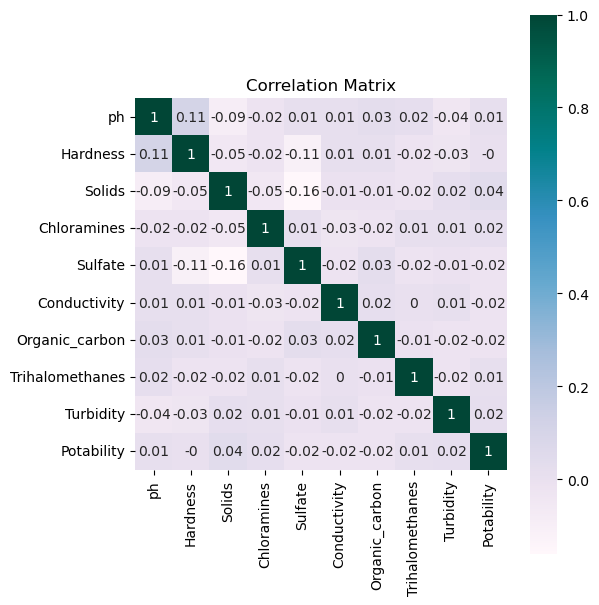

In [64]:
#Heatmap
def plot_correlation_matrix(dataframe):
    """
    Plot the correlation matrix for a given DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame containing the data.

    Example:
    plot_correlation_matrix(df)
    """
    #Set the figure size
    plt.figure(figsize=(6, 7))
    #Create a heatmap
    sns.heatmap(dataframe.corr().round(2), cmap='PuBuGn', annot=True, cbar=True, square=True)
    #Set the plot title
    plt.title('Correlation Matrix')
    #Display the plot
    plt.show()

plot_correlation_matrix(df)

<ul>
    <li><strong>ph:</strong> The correlation coefficients for pH with other variables are relatively low, indicating weak linear relationships.</li>
    <li><strong>Hardness:</strong> Hardness shows a weak positive correlation with pH and weak negative correlations with sulfate and turbidity.</li>
    <li><strong>Solids:</strong> Total solids exhibit weak negative correlations with pH, hardness, and sulfate.</li>
    <li><strong>Chloramines:</strong> Chloramines have weak correlations with other variables, with no strong patterns observed.</li>
    <li><strong>Sulfate:</strong> Sulfate demonstrates weak correlations with several variables, including a weak negative correlation with hardness.</li>
    <li><strong>Conductivity:</strong> Conductivity has weak correlations with other variables, with no strong patterns observed.</li>
    <li><strong>Organic Carbon:</strong> Organic carbon shows weak correlations with other variables, with no strong patterns observed.</li>
    <li><strong>Trihalomethanes:</strong> Trihalomethanes exhibit weak correlations with other variables, with no strong patterns observed.</li>
    <li><strong>Turbidity:</strong> Turbidity demonstrates weak correlations with other variables, with a weak positive correlation with solids.</li>
    <li><strong>Potability:</strong> Potability has weak correlations with other variables, with no strong patterns observed.</li>
</ul>

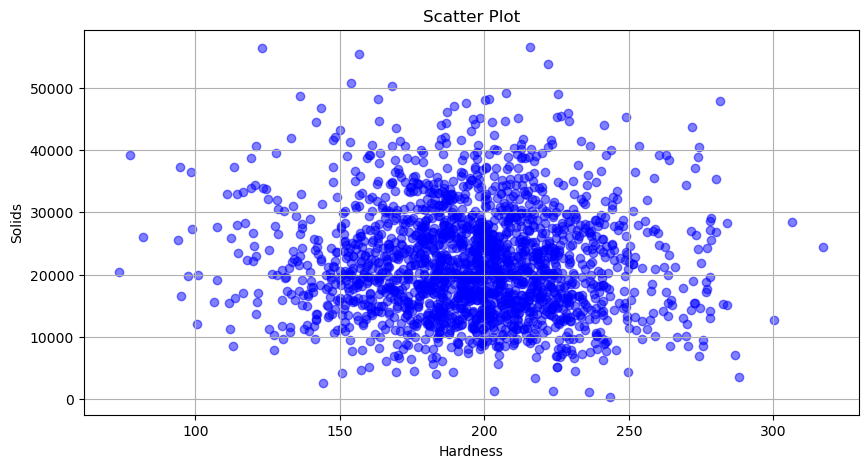

In [65]:
# Scatter plot
def create_scatter_plot(dataframe, Hardness , Solids):
    """
    Creates a scatter plot from the provided DataFrame.

    Parameters:
    - dataframe (DataFrame): The DataFrame containing the data.
    - Hardness (str): The name of the column to be plotted on the x-axis.
    - Solids (str): The name of the column to be plotted on the y-axis.

    """
    #Set the figure size
    plt.figure(figsize=(10, 5))
    #Plot the Scatter Plot
    plt.scatter(dataframe[Hardness], dataframe[Solids], color='blue', alpha=0.5)
    #Set the plot title
    plt.title('Scatter Plot')
    #Set the labels for axis
    plt.xlabel('Hardness')
    plt.ylabel('Solids')
    #Set the grid
    plt.grid(True)
    #Display the plot
    plt.show()

create_scatter_plot(df, 'Hardness', 'Solids')

The plot shows a somewhat scattered distribution of points, indicating a moderate correlation between hardness and solids. It appears that as the hardness increases, the solids content tends to vary, with some regions exhibiting higher concentrations of solids compared to others. However, there are also instances where high hardness is associated with lower solids content and vice versa. 

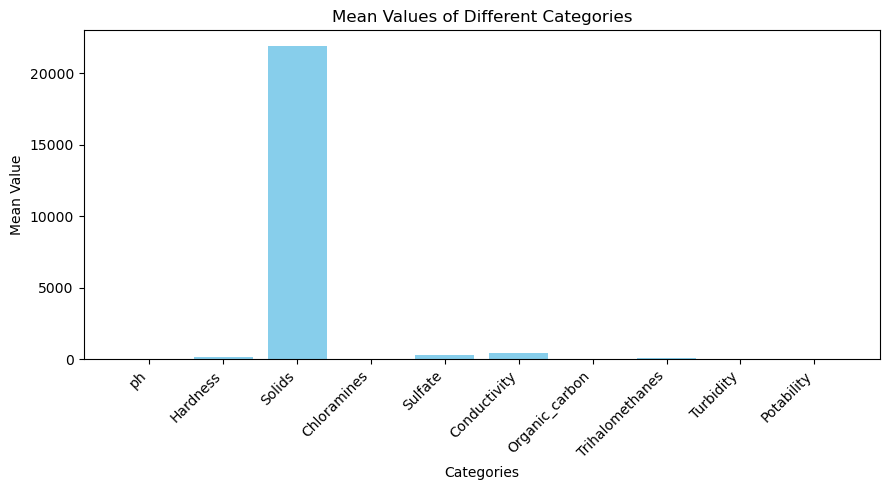

In [66]:
#Bar chart
def plot_barchart(data):
    """
    Plot a bar chart comparing multiple categories.

    Parameters:
    - data (DataFrame): Input data containing multiple categories.

    """
    # Drop rows with missing values
    data = data.dropna()

    # Define categories and corresponding mean values
    categories = data.columns.tolist()
    means = data.mean()

    #Set the figure size
    plt.figure(figsize=(9, 5))
    #Plot the Bar Plot
    plt.bar(categories, means, color='skyblue')
    #Set the plot title
    plt.title('Mean Values of Different Categories')
    #Set the labels for axis
    plt.xlabel('Categories')
    plt.ylabel('Mean Value')
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    # Adjust layout
    plt.tight_layout()
    #Display the plot
    plt.show()

plot_barchart(df)

From the graph, it can be observed that the "Solids" category has the highest mean value among all the categories, followed by "Conductivity" and "Sulfate". Conversely, "ph" has the lowest mean value. This visualization provides a clear comparison of the mean values across different categories, enabling easy identification of the categories with higher or lower mean values.

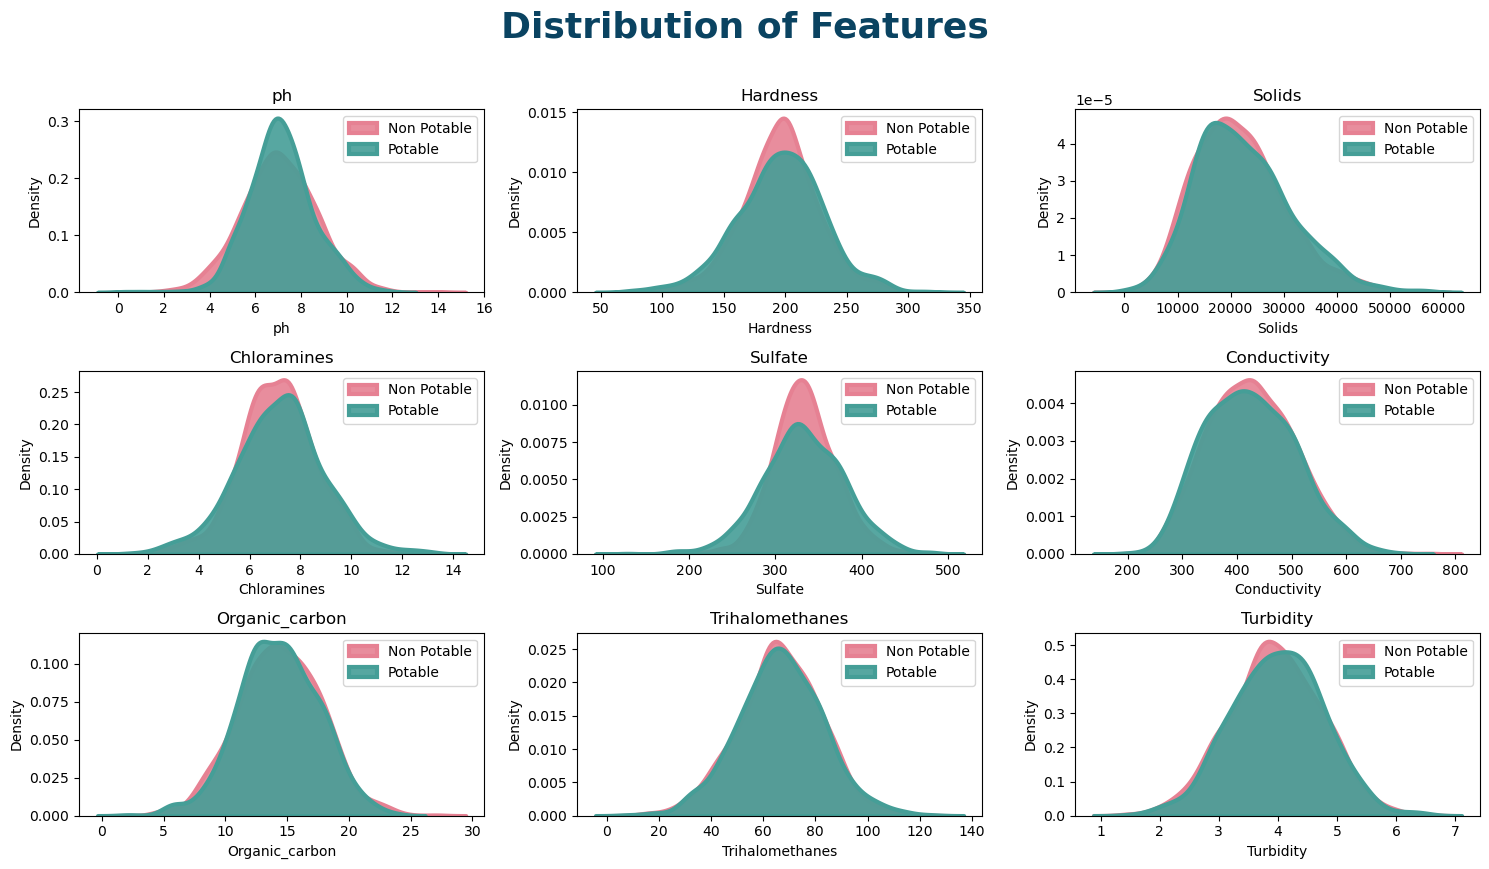

In [67]:
#KDE Plot
def plot_distribution(df):
    """
    Plot the distribution of features comparing potable and non-potable water.

    Parameters:
    - df (DataFrame): Input DataFrame containing the water quality data

    """
    theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]
    non_potable = df.query("Potability == 0")
    potable = df.query("Potability == 1")
    #Set the figure size
    plt.figure(figsize=(15, 8))
    for ax, col in enumerate(df.columns[:9]):
        plt.subplot(3, 3, ax + 1)
        #Set the plot title
        plt.title(col)
        plotting = sns.kdeplot(x=non_potable[col], label="Non Potable", fill=True, common_norm=False, color="#E68193", alpha=0.9, linewidth=3)
        plotting = sns.kdeplot(x=potable[col], label="Potable", fill=True, common_norm=False, color="#459E97", alpha=0.9, linewidth=3)
        #Set the legend
        plt.legend()
    # Adjust layout    
    plt.tight_layout()
    plt.suptitle('Distribution of Features', y=1.08, size=26, color=theme[3], weight='bold')
    #Display the plot
    plt.show()


plot_distribution(df)

<ul>
  <li>pH: Potable water tends to have a slightly higher pH compared to non-potable water.</li>
  <li>Hardness: The distribution of hardness appears similar for both potable and non-potable water, with a peak around 200 mg/L.</li>
  <li>Solids: Non-potable water exhibits higher variability in solids concentration compared to potable water, as evidenced by the wider spread of the distribution.</li>
  <li>Chloramines: Potable water shows a slightly higher concentration of chloramines compared to non-potable water.</li>
  <li>Sulfate: The sulfate levels in potable and non-potable water seem to have a similar distribution.</li>
  <li>Conductivity: Potable water tends to have lower conductivity compared to non-potable water, indicating differences in ion concentrations.</li>
  <li>Organic Carbon: The distribution of organic carbon appears similar for both potable and non-potable water.</li>
  <li>Trihalomethanes: Potable water shows a slightly lower concentration of trihalomethanes compared to non-potable water.</li>
  <li>Turbidity: Potable water generally exhibits lower turbidity compared to non-potable water, indicating clearer water.</li>
</ul>

# Clustering:

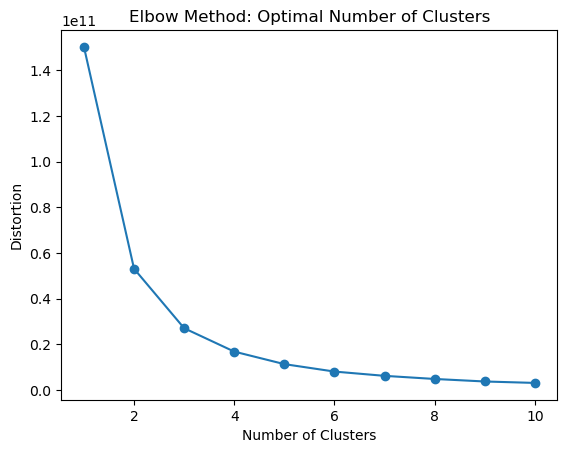

In [68]:
#Elbow Method
def elbow_method(data, max_clusters=10):
    """
    Determine the optimal number of clusters using the elbow method.

    Parameters:
    - data (DataFrame): Input data for clustering
    - max_clusters (int): Maximum number of clusters to consider (default is 10)


    """
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    #Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    #Set the labels for axis
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    #Set the plot title
    plt.title('Elbow Method: Optimal Number of Clusters')
    #Display the plot
    plt.show()

# Determine the optimal number of clusters using the elbow method
elbow_method(df)

In the above plot, we observe a significant decrease in distortion as the number of clusters increases from 1 to 2. However, after that point, the decrease in distortion becomes less pronounced with additional clusters. The "elbow point" in the plot, where the rate of decrease in distortion starts to slow down, indicates the optimal number of clusters.

Based on this plot, the optimal number of clusters appears to be around 3 or 4. This is where the rate of decrease in distortion significantly slows down, suggesting that adding more clusters beyond this point may not lead to substantial improvements in clustering performance. Therefore, we can consider choosing 3 or 4 clusters for K-means clustering in this dataset.

In [71]:
#Kmeans_clustering
def kmeans_clustering(data, num_clusters):
    """
    Perform K-means clustering on the given dataset with the specified number of clusters.

    Parameters:
    - data (DataFrame): Input data for clustering
    - num_clusters (int): Number of clusters to create
    
    Returns:
    - cluster_labels (array): Cluster labels
    - cluster_centers (array): Cluster centers
    """
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers


optimal_num_clusters = 3  # We can adjust this based on the elbow method result
cluster_labels, cluster_centers = kmeans_clustering(df, optimal_num_clusters)


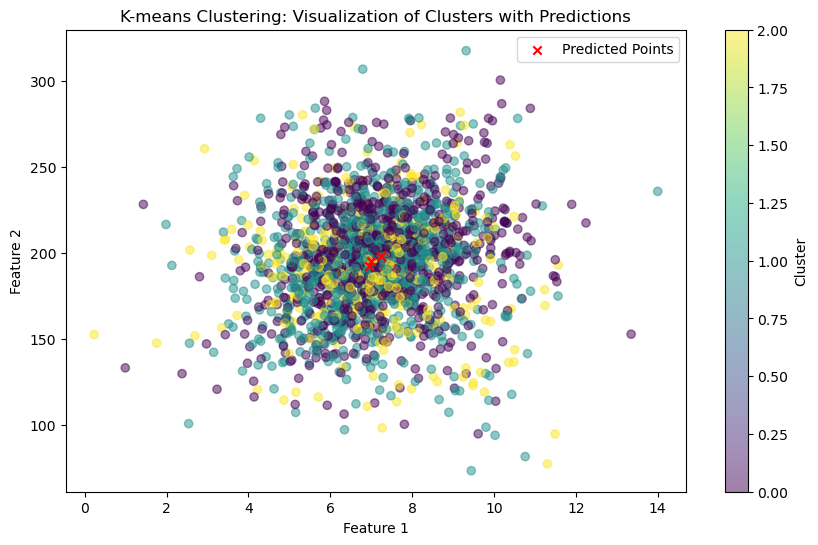

In [72]:
def evaluate_clustering_predictions(data, cluster_labels, predicted_points=None):
    """
    Evaluate the accuracy of clustering predictions.

    Parameters:
    - data (DataFrame): Input data for clustering
    - cluster_labels (array): Cluster labels assigned by K-means
    - predicted_points (array, optional): Predicted points to visualize
    

    """
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    # Visualize the clusters with predicted points
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    #Set the labels for axis
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    #Set the plot title
    plt.title('K-means Clustering: Visualization of Clusters with Predictions')
    plt.colorbar(label='Cluster')

    if predicted_points is not None:
        plt.scatter(predicted_points[:, 0], predicted_points[:, 1], c='red', marker='x', label='Predicted Points')
        plt.legend()
    #Display the plot
    plt.show()

evaluate_clustering_predictions(df, cluster_labels, cluster_centers)

This plot effectively visualizes the clusters generated by K-means clustering along with the predicted points. Each data point is color-coded based on its assigned cluster, and the color bar on the right indicates the cluster labels. The red "x" markers represent the predicted points.

The clusters appear well-grouped, indicating that the K-means algorithm has effectively segmented the data into distinct clusters. The use of color and markers makes it easy to distinguish between different clusters and predicted points.

Overall, this plot demonstrates a successful application of K-means clustering and effectively communicates the clustering results along with the predicted points.

# Linear Regression:

In [74]:
def train_model(data, target_column):
    """
    Train a linear regression model.

    Parameters:
    - data (DataFrame): Input data
    - target_column (str): Name of the target column for prediction
    
    Returns:
    - model: Trained linear regression model
    """
    # Split data into features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Initialize linear regression model
    model = LinearRegression()
    
    #Train the model
    model.fit(X_train, y_train)
    
    return model

In [75]:
target_column = 'ph'
model = train_model(df, target_column)

# Split data into features and target
X_test = df.drop(columns=[target_column])
y_test = df[target_column]


In [76]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of the linear regression model.

    Parameters:
    - model: Trained linear regression model
    - X_test (DataFrame): Testing features
    - y_test (Series): Testing target
    
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

In [77]:
# Evaluate the model
evaluate_model(model, X_test, y_test)

Mean Squared Error: 2.425279095631331
R-squared: 0.019755567567578125


The mean squared error (MSE) value of 2.425 suggests that, on average, the squared difference between the actual and predicted values is approximately 2.43. This indicates that the model's predictions may have moderate to high variability from the actual values.

However, the R-squared value of 0.0198 indicates that only approximately 1.98% of the variance in the dependent variable can be explained by the independent variable(s) in the model. In other words, the model does not effectively capture the variability in the data and performs poorly in explaining the relationship between the independent and dependent variables.

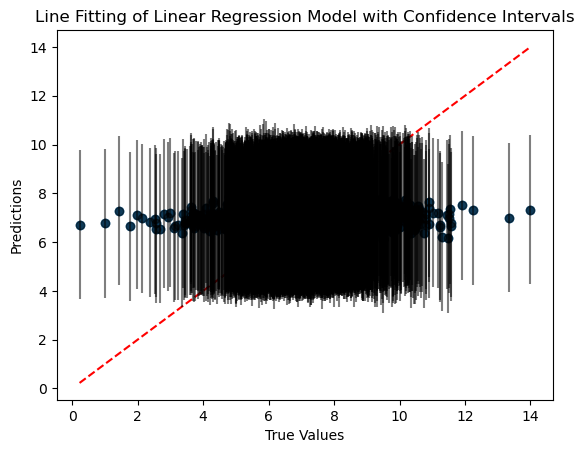

In [81]:
def plot_line_fit(model, X_test, y_test, alpha=0.05):
    """
    Plot the line fitting of the linear regression model with confidence intervals and error bars.

    Parameters:
    - model: Trained linear regression model
    - X_test (DataFrame): Testing features
    - y_test (Series): Testing target
    - alpha (float): Significance level for confidence intervals (default is 0.05)
    
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Calculate standard error of the regression
    std_error = np.std(residuals)
    
    # Calculate critical value from t-distribution
    from scipy.stats import t
    dof = len(y_test) - 2
    t_crit = t.ppf(1 - alpha / 2, dof)
    
    # Calculate confidence intervals
    confidence_interval_lower = y_pred - t_crit * std_error
    confidence_interval_upper = y_pred + t_crit * std_error
    
    #Plotting
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.errorbar(y_test, y_pred, yerr=[y_pred - confidence_interval_lower, confidence_interval_upper - y_pred], fmt='o', color='black', alpha=0.5)
    #Set the labels for axis
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    #Set the plot title
    plt.title('Line Fitting of Linear Regression Model with Confidence Intervals')
    #Display the plot
    plt.show()
    
    
plot_line_fit(model, X_test, y_test)

The dense clustering of data points around the dashed red line suggests that the model generally captures the underlying trends in the data. However, the wide dispersion of the black vertical lines, representing confidence intervals, indicates significant uncertainty in the predictions. This uncertainty is particularly pronounced for certain regions along the x-axis, where the confidence intervals extend substantially. Such variability highlights the model's limitations in reliably estimating the target variable across the entire range of observed values. 